#PROJECT 22:

#batchnumber 12

#TITLE: OPINION MINING FOR HOTEL RATING THROUGH REVIEWS



> #Abstract: In this project, there will be a web application where user will provide review about hotels. This review will be in sentence form. System will extract certain keywords from the sentence and will minekeywords in database and system will rate the hotels based on the reviews of various users. We presented machine learning and Sentiment Word Net based method for opinion mining from hotel reviews and sentence relevance score based method for opinion summarization of hotel reviews. . The classified and summarized hotel review information helps web users to understand review contents easily in a short time.Opinion Mining for Hotel Review system that detects hidden sentiments in feedback of the customer andrates the feedback accordingly. The system uses opinion mining methodology in order to achieve desired functionality. Opinion mining for hotel reviews is a web application which gives review of the feedback thatis posted by various users. The System takes review of various users, based on the opinion, system willspecify whether the posted hotel is good, bad, or worst. We use a database of sentiment based keywords along with positivity or negativity weight in database and then based on these sentiment keywords mined inuser review is ranked. Using this application User will get to know which hotel is best and suitable for them.User can decide which hotel to accommodate before they reach the place



In [ ]:
#dataset

ntlk-natural language tool kit . nltk is a platform used for building Python programs that work with human language data

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

using ntlk sentimant vader we are importing sentiment intensity analyzer to classify various text into positive and negative categories

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("Hotel_Reviews.csv")
print(data.head())

                                       Hotel_Address  ...       lng
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...  4.915968
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...  4.915968
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...  4.915968
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...  4.915968
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...  4.915968

[5 rows x 17 columns]


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
##NTLK-natural language tool kit-python module

In [ ]:
data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,1 3 Queens Garden Westminster Borough London W...,1058,3/11/2017,7.7,The Park Grand London Paddington,United Kingdom,My room was a compact double and it was reall...,34.0,4380.0,Lovely old hotel is quiet Georgian square bet...,26.0,51.0,8.3,"[' Business trip ', ' Solo traveler ', ' Compa...",145 day,51.514218,-0.180903
2137,1 3 Queens Garden Westminster Borough London W...,1058,3/10/2017,7.7,The Park Grand London Paddington,United Kingdom,Bedrooms,2.0,4380.0,Deluxe rooms could not swing a cat in it Bath...,40.0,1.0,6.3,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",146 day,51.514218,-0.180903
2138,1 3 Queens Garden Westminster Borough London W...,1058,3/7/2017,7.7,The Park Grand London Paddington,United Kingdom,The room was lovely and modern but some furni...,45.0,4380.0,The room was quite a good size and bright and...,12.0,3.0,7.5,"[' Leisure trip ', ' Couple ', ' Club Double R...",149 day,51.514218,-0.180903
2139,1 3 Queens Garden Westminster Borough London W...,1058,3/7/2017,7.7,The Park Grand London Paddington,United Kingdom,The floor in our room was very slippery and w...,40.0,4380.0,Food was hot and tasty with excellent service,9.0,1.0,9.6,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",149 day,51.514218,-0.180903


In [ ]:
data.dropna()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,1 3 Queens Garden Westminster Borough London W...,1058,3/12/2017,7.7,The Park Grand London Paddington,United Kingdom,I was charged 300 more than I should ve been ...,27.0,4380.0,Excellent room service nice rooms good location,8.0,1.0,6.7,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",144 day,51.514218,-0.180903
2136,1 3 Queens Garden Westminster Borough London W...,1058,3/11/2017,7.7,The Park Grand London Paddington,United Kingdom,My room was a compact double and it was reall...,34.0,4380.0,Lovely old hotel is quiet Georgian square bet...,26.0,51.0,8.3,"[' Business trip ', ' Solo traveler ', ' Compa...",145 day,51.514218,-0.180903
2137,1 3 Queens Garden Westminster Borough London W...,1058,3/10/2017,7.7,The Park Grand London Paddington,United Kingdom,Bedrooms,2.0,4380.0,Deluxe rooms could not swing a cat in it Bath...,40.0,1.0,6.3,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",146 day,51.514218,-0.180903
2138,1 3 Queens Garden Westminster Borough London W...,1058,3/7/2017,7.7,The Park Grand London Paddington,United Kingdom,The room was lovely and modern but some furni...,45.0,4380.0,The room was quite a good size and bright and...,12.0,3.0,7.5,"[' Leisure trip ', ' Couple ', ' Club Double R...",149 day,51.514218,-0.180903


In [ ]:
data.shape

(2141, 17)

In [ ]:
#checking weather there are any null values present in the dataset

In [ ]:
data.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             1
Total_Number_of_Reviews                       1
Positive_Review                               1
Review_Total_Positive_Word_Counts             1
Total_Number_of_Reviews_Reviewer_Has_Given    1
Reviewer_Score                                1
Tags                                          1
days_since_review                             1
lat                                           1
lng                                           1
dtype: int64

In [ ]:
data['Negative_Review'].describe()

count            2141
unique           1397
top       No Negative
freq              611
Name: Negative_Review, dtype: object

In [ ]:
data['Positive_Review'].describe()

count            2140
unique           2005
top       No Positive
freq              103
Name: Positive_Review, dtype: object

In [ ]:
data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,2141.000000,2141.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,476.427370,8.638020,18.801869,2289.076636,21.298131,6.925701,8.728411,51.668252,0.814934
std,251.419854,0.615859,31.078675,725.776070,22.678803,10.246408,1.493416,0.334699,1.982204
min,194.000000,7.700000,0.000000,1403.000000,0.000000,1.000000,2.500000,51.491888,-0.194971
25%,244.000000,7.700000,0.000000,1831.000000,7.000000,1.000000,7.900000,51.491888,-0.194971
50%,639.000000,8.500000,8.000000,2619.000000,14.000000,3.000000,9.200000,51.513734,-0.108751
75%,639.000000,9.200000,24.000000,2619.000000,27.000000,8.000000,10.000000,51.514218,-0.108751
max,1058.000000,9.200000,397.000000,4380.000000,186.000000,85.000000,10.000000,52.360576,4.915968


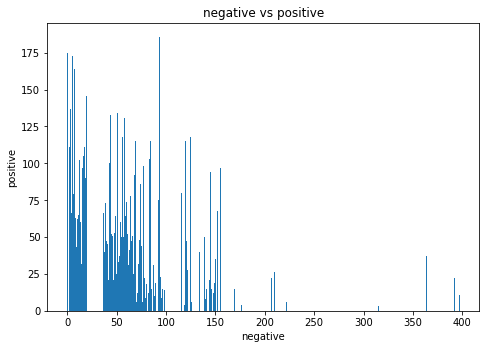

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
attacks=data['Review_Total_Negative_Word_Counts']
defense = data['Review_Total_Positive_Word_Counts']
ax.bar(attacks,defense)
ax.set_xlabel('negative')
ax.set_ylabel('positive')
ax.set_title('negative vs positive')
plt.show()

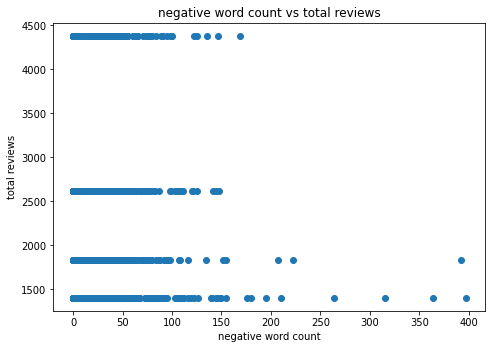

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
attacks=data['Review_Total_Negative_Word_Counts']
defense = data['Total_Number_of_Reviews']
ax.scatter(attacks,defense)
ax.set_xlabel('negative word count')
ax.set_ylabel('total reviews')
ax.set_title('negative word count vs total reviews')
plt.show()

In [ ]:
#visualizing hotel review rating score

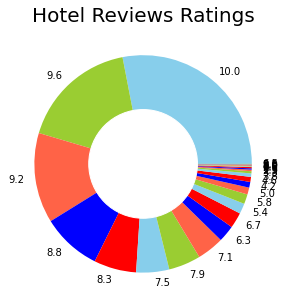

In [ ]:
ratings = data["Reviewer_Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [ ]:
#highest rating btw postive rating , negative rating and neutral

In [ ]:
x = sum(data["Review_Total_Positive_Word_Counts"])
y = sum(data["Review_Total_Negative_Word_Counts"])
z = sum(data["Additional_Number_of_Scoring"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


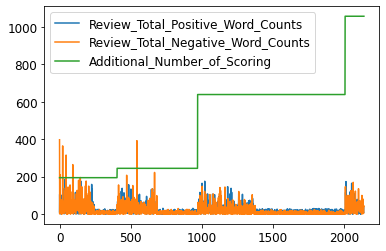

In [ ]:
dataset2 = data[["Review_Total_Positive_Word_Counts","Review_Total_Negative_Word_Counts","Additional_Number_of_Scoring"]]
dataset2.plot()

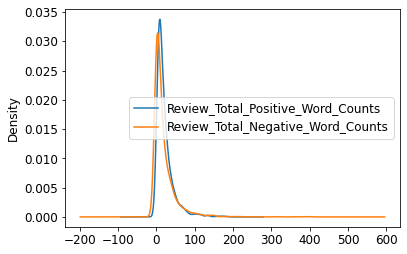

In [ ]:
data[["Review_Total_Positive_Word_Counts", "Review_Total_Negative_Word_Counts"]].plot.kde() 

In [ ]:
#negative words from hotel review

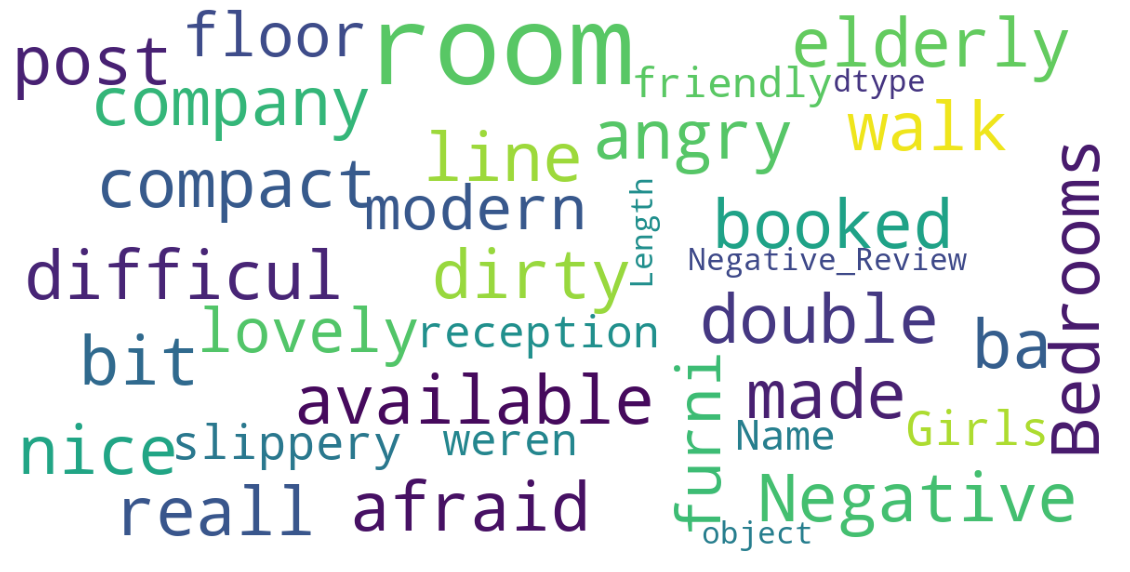

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Negative_Review"])

In [ ]:
#positive words from hotel review

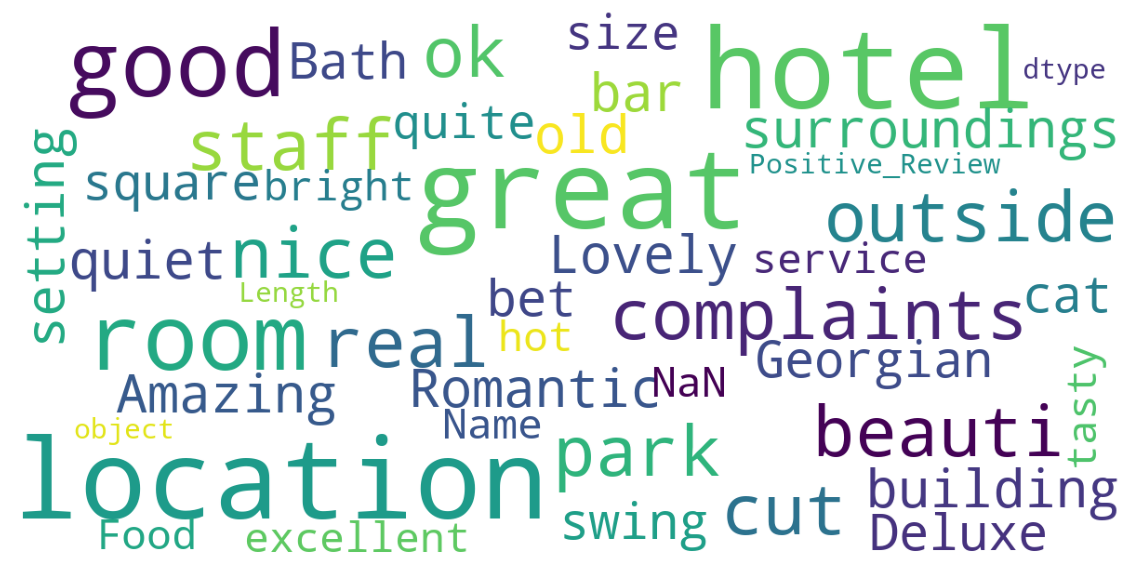

In [ ]:
show_wordcloud(data["Positive_Review"])

In [ ]:
data['Review_Total_Negative_Word_Counts'].mean()

18.801869158878503

In [ ]:
data['Review_Total_Positive_Word_Counts'].mean()

21.298130841121495

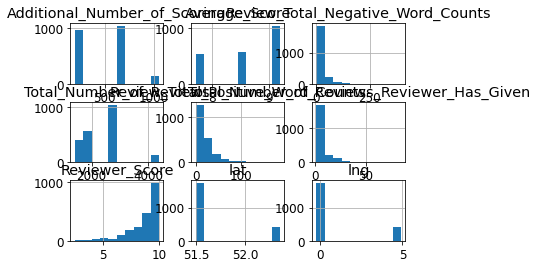

In [ ]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
#correlation btw negative word cound and positive word count

In [ ]:
correlation = data[['Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].corr()

In [ ]:
correlation

,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts
Review_Total_Negative_Word_Counts,1.000000,0.098358
Review_Total_Positive_Word_Counts,0.098358,1.000000


In [ ]:
#visualizing correlation btw positive and negative word count using heat map

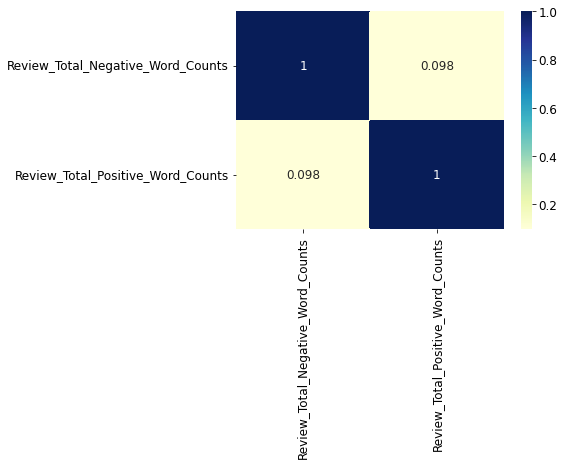

In [ ]:
import seaborn as sb
dp = sb.heatmap(correlation, cmap="YlGnBu", annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

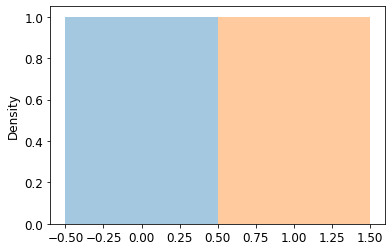

In [ ]:
import seaborn as sns

for x in [0, 1]:
    subset = data[data['Positive_Review'] == x]
    
    # Draw the density plot
    if x == 0:
        l = "Good reviews"
    else:
        l = "Bad reviews"
    sns.distplot(x,label=l)

# New Section

In [ ]:
h = data['Hotel_Name'].unique()

In [ ]:
p=data['Hotel_Name'].value_counts()

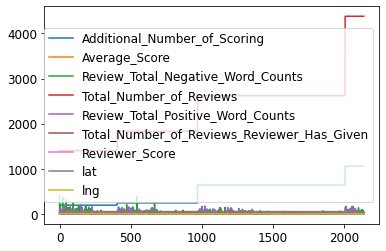

In [ ]:
data.plot()

In [ ]:
def f(x):
    a = x['Review_Total_Negative_Word_Counts'].sum()
    b = x['Review_Total_Positive_Word_Counts'].sum()
    return pd.Series([a,b], index=['Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts'])

p=data.groupby('Hotel_Name').apply(f)

p

,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts
Hotel_Name,,
Apex Temple Court Hotel,12435.0,20421.0
Hotel Arena,12474.0,9574.0
K K Hotel George,10417.0,11671.0
The Park Grand London Paddington,4910.0,3912.0
